In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import zipfile
import shutil
import os

In [ ]:
!wget https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-07-26 00:18:57--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  4.68MB/s    in 67s     

2021-07-26 00:20:06 (4.58 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
!unzip -q '/content/rockpaperscissors.zip' -d .

In [ ]:
#ekstrak
local_zip = '/content/Tugas/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content/Tugas')
zip_ref.close()

In [ ]:
os.listdir('/content/rockpaperscissors')

['rps-cv-images', 'scissors', 'rock', 'README_rpc-cv-images.txt', 'paper']

In [ ]:
#membuat direktori
base_dir = '/content/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [ ]:
train_dir

'/content/rockpaperscissors/train'

In [ ]:
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [ ]:
rock_dir

'/content/rockpaperscissors/rock'

In [ ]:
#train dan validation data train berisi 60% dari directory aslinya dan data val berisi 40%.
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size=0.4)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size=0.4)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size=0.4)

In [ ]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(train_paper):
  os.mkdir(train_paper)
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)

if not os.path.exists(val_rock):
  os.mkdir(val_rock)
if not os.path.exists(val_paper):
  os.mkdir(val_paper)
if not os.path.exists(val_scissors):
  os.mkdir(val_scissors)

In [ ]:
for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))

In [ ]:
#data generator
train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
#membuat model 
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)

Epoch 1/20
25/25 - 45s - loss: 1.0904 - accuracy: 0.4200 - val_loss: 0.9081 - val_accuracy: 0.6313
Epoch 2/20
25/25 - 48s - loss: 0.5985 - accuracy: 0.7675 - val_loss: 0.3562 - val_accuracy: 0.8500
Epoch 3/20
25/25 - 45s - loss: 0.2460 - accuracy: 0.9125 - val_loss: 0.1259 - val_accuracy: 0.9750
Epoch 4/20
25/25 - 45s - loss: 0.2276 - accuracy: 0.9312 - val_loss: 0.1839 - val_accuracy: 0.9438
Epoch 5/20
25/25 - 45s - loss: 0.2033 - accuracy: 0.9262 - val_loss: 0.2594 - val_accuracy: 0.9187
Epoch 6/20
25/25 - 45s - loss: 0.2792 - accuracy: 0.9013 - val_loss: 0.2369 - val_accuracy: 0.9438
Epoch 7/20
25/25 - 45s - loss: 0.1830 - accuracy: 0.9400 - val_loss: 0.1221 - val_accuracy: 0.9438
Epoch 8/20
25/25 - 45s - loss: 0.1676 - accuracy: 0.9350 - val_loss: 0.1304 - val_accuracy: 0.9438
Epoch 9/20
25/25 - 45s - loss: 0.1441 - accuracy: 0.9588 - val_loss: 0.1200 - val_accuracy: 0.9750
Epoch 10/20
25/25 - 45s - loss: 0.1073 - accuracy: 0.9650 - val_loss: 0.2008 - val_accuracy: 0.9438
Epoch 11/

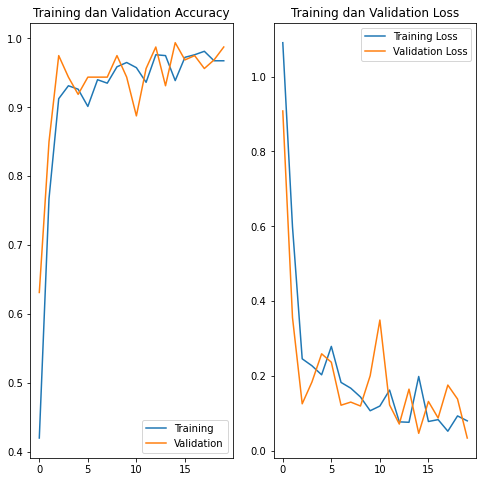

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training')
plt.plot(epochs_range, val_acc, label='Validation')
plt.legend(loc='lower right')
plt.title('Training dan Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training dan Validation Loss')
plt.show()

Saving 3bkC6JAPog7xX9WO.png to 3bkC6JAPog7xX9WO.png
3bkC6JAPog7xX9WO.png
scissors


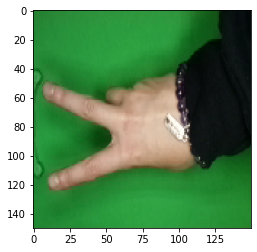

In [ ]:
upload = files.upload()

for fn in upload.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')